In [1]:
import pandas as pd
import os
from os.path import join, isdir
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [357]:
models = '../models'
optims = []
def get_data(model_dir):
    try:
        data1  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        data  = pd.read_csv(join(model_dir, 'batch_loss.csv'))
        data = data1.merge(data, on='epoch', suffixes=('_epoch', '_batch'))
        optim = pd.read_json(join(model_dir, 'optimizer.json'), typ='series')
        optims.append(optim)
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name']
    data['learning_rate'] = optim['learning_rate']
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_.*')
df['experiment'] = '0.001 LR, batch, asl_alphabet_train'
batches = df['batch'].max()
df['iteration'] = (df['batch'] + 1) + (df['epoch'] * batches)
df = df[df['job_id'] == '202102252233']
df

,epoch,acc_epoch,epoch_time,loss_epoch,val_acc,val_loss,acc_batch,batch,batch_time,loss_batch,size,model_dir,optimizer,learning_rate,job_id,experiment,iteration
0,0,0.979004,184.963724,0.104377,0.875747,0.676438,0.984375,0,2.116743,0.028001,64,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",1
1,0,0.979004,184.963724,0.104377,0.875747,0.676438,0.984375,1,0.038301,0.020013,64,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",2
2,0,0.979004,184.963724,0.104377,0.875747,0.676438,1.000000,2,0.043477,0.000212,64,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",3
3,0,0.979004,184.963724,0.104377,0.875747,0.676438,1.000000,3,0.041842,0.000075,64,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",4
4,0,0.979004,184.963724,0.104377,0.875747,0.676438,1.000000,4,0.046491,0.001177,64,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,9,0.973908,157.130418,0.094241,0.867356,0.586511,0.953125,1219,0.041522,0.122416,64,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12227
12236,9,0.973908,157.130418,0.094241,0.867356,0.586511,1.000000,1220,0.036569,0.012563,64,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12228
12237,9,0.973908,157.130418,0.094241,0.867356,0.586511,0.984375,1221,0.031898,0.045762,64,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12229
12238,9,0.973908,157.130418,0.094241,0.867356,0.586511,0.953125,1222,0.038250,0.173489,64,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12230


In [239]:
df.groupby('optimizer').agg({'batch_time':'mean'})

,batch_time
optimizer,
AdaBelief,0.033628
Adadelta,0.032983
Adagrad,0.032059
Adam,0.032608
Adamax,0.032886
Nadam,0.035073
RAdam,0.034245
RMSprop,0.031832
Yogi,0.033818


In [358]:
def func(df):
    newdf = df.groupby(['iteration']).mean()
    b = newdf.groupby(newdf.index // 50).agg({'acc_batch': 'mean','val_acc': lambda x: x.iloc[0],
                                                'loss_batch': 'mean', 'val_loss': lambda x: x.iloc[0]})
    return b
a = df.groupby('optimizer').apply(func)
a

acc_batch   val_acc  loss_batch  val_loss
optimizer iteration                                           
AdaBelief 0           0.970344  0.833908    0.099595  0.616060
          1           0.970938  0.833908    0.096259  0.616060
          2           0.959688  0.833908    0.131224  0.616060
          3           0.960000  0.833908    0.114990  0.616060
          4           0.967812  0.833908    0.092577  0.616060
...                        ...       ...         ...       ...
Yogi      240         0.985313  0.872069    0.046318  0.461264
          241         0.989375  0.872069    0.036241  0.461264
          242         0.984598  0.872069    0.046376  0.461264
          243         0.978437  0.872069    0.058600  0.461264
          244         0.981934  0.872069    0.047142  0.461264

[2205 rows x 4 columns]

In [359]:
c = a.reset_index(level=['optimizer', 'iteration'])
c

,optimizer,iteration,acc_batch,val_acc,loss_batch,val_loss
0,AdaBelief,0,0.970344,0.833908,0.099595,0.616060
1,AdaBelief,1,0.970938,0.833908,0.096259,0.616060
2,AdaBelief,2,0.959688,0.833908,0.131224,0.616060
3,AdaBelief,3,0.960000,0.833908,0.114990,0.616060
4,AdaBelief,4,0.967812,0.833908,0.092577,0.616060
...,...,...,...,...,...,...
2200,Yogi,240,0.985313,0.872069,0.046318,0.461264
2201,Yogi,241,0.989375,0.872069,0.036241,0.461264
2202,Yogi,242,0.984598,0.872069,0.046376,0.461264
2203,Yogi,243,0.978437,0.872069,0.058600,0.461264


In [360]:
c.loc[c.duplicated('val_acc', keep='last'), 'val_acc'] = np.nan
c.loc[c.duplicated('val_loss', keep='last'), 'val_loss'] = np.nan
c

,optimizer,iteration,acc_batch,val_acc,loss_batch,val_loss
0,AdaBelief,0,0.970344,NaN,0.099595,NaN
1,AdaBelief,1,0.970938,NaN,0.096259,NaN
2,AdaBelief,2,0.959688,NaN,0.131224,NaN
3,AdaBelief,3,0.960000,NaN,0.114990,NaN
4,AdaBelief,4,0.967812,NaN,0.092577,NaN
...,...,...,...,...,...,...
2200,Yogi,240,0.985313,NaN,0.046318,NaN
2201,Yogi,241,0.989375,NaN,0.036241,NaN
2202,Yogi,242,0.984598,NaN,0.046376,NaN
2203,Yogi,243,0.978437,NaN,0.058600,NaN


Text(0.5, 1.0, 'Top-1 classification accuracy per batch iteration')

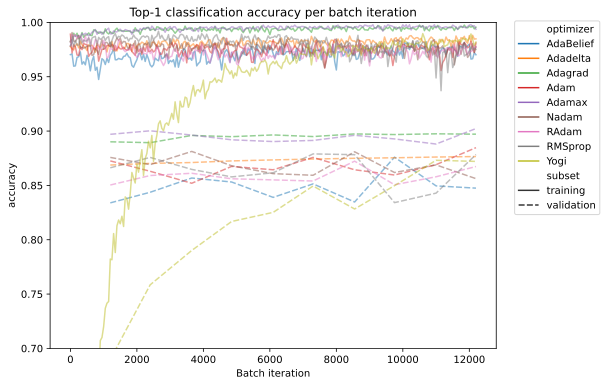

In [366]:
d = c.rename(columns={'acc_batch': 'training', 'val_acc': 'validation'})
molten = d.melt(id_vars=['iteration', 'optimizer'],
                 var_name='subset',
                 value_vars=['training', 'validation'],
                 value_name='accuracy')\
             .sort_values('optimizer')
fig, ax = plt.subplots(figsize=(8, 6))
molten['iteration2'] = molten['iteration'] * 50
g=sns.lineplot(data=molten, x='iteration2', y='accuracy',
            hue='optimizer', style='subset', ax=ax, alpha=0.5)
g.set(ylim=(0.7, 1))
ax.legend(bbox_to_anchor=(1.03, 1.02))
df['epoch2'] = df['epoch']/df['epoch'].max() * molten['iteration'].max()
plt.xlabel('Batch iteration')
plt.title('Top-1 classification accuracy per batch iteration')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Loss per batch iteration')

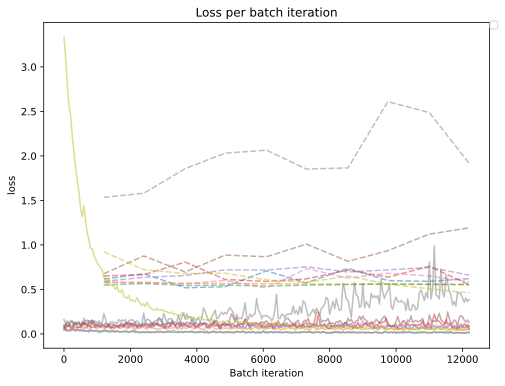

In [365]:
d = c.rename(columns={'loss_batch': 'training', 'val_loss': 'validation'})
molten = d.melt(id_vars=['iteration', 'optimizer'],
                 var_name='subset',
                 value_vars=['training', 'validation'],
                 value_name='loss')\
             .sort_values('optimizer')
fig, ax = plt.subplots(figsize=(8, 6))
molten['iteration2'] = molten['iteration'] * 50
g=sns.lineplot(data=molten, x='iteration2', y='loss',
            hue='optimizer', style='subset', ax=ax, alpha=0.5,legend=False)
# g.set(ylim=(0.7, 1))
ax.legend(bbox_to_anchor=(1.03, 1.02))
df['epoch2'] = df['epoch']/df['epoch'].max() * molten['iteration'].max()
plt.xlabel('Batch iteration')
plt.title('Loss per batch iteration')

In [349]:
models = '../models'
optims = []
def get_data(model_dir):
    try:
        data  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        optim = pd.read_json(join(model_dir, 'optimizer.json'), typ='series')
        optims.append(optim)
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name']
    data['learning_rate'] = optim['learning_rate']
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_.*')
df['experiment'] = '0.001 LR, asl_alphabet_train'
df = df[df['job_id']=='kaggle']
df

,epoch,acc,epoch_time,loss,val_acc,val_loss,model_dir,optimizer,learning_rate,job_id,experiment
0,0,0.974266,228.573749,0.081922,0.847931,0.622176,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
1,1,0.972439,200.114905,0.087682,0.827701,0.639547,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
2,2,0.974866,203.326429,0.082131,0.865057,0.533325,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
3,3,0.977663,212.581068,0.074508,0.833678,0.647177,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
4,4,0.977446,187.569030,0.074157,0.858506,0.626244,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
...,...,...,...,...,...,...,...,...,...,...,...
5,5,0.995070,198.133088,0.017280,0.882529,0.654862,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"
6,6,0.995083,179.789485,0.017239,0.883218,0.664942,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"
7,7,0.995543,178.097512,0.016157,0.884828,0.660620,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"
8,8,0.995479,181.355024,0.016407,0.885517,0.653384,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"


In [199]:
for optim in optims:
    name = optim['name']
    optidf = pd.DataFrame.from_records([{'name': name}])
    optidf = df.assign(**optim)
    print()
    print(optidf)

e-07  0.001  Yogi  
7   1.000000e-07  0.001  Yogi  
8   1.000000e-07  0.001  Yogi  
9   1.000000e-07  0.001  Yogi  

[100 rows x 18 columns]

    epoch       acc  epoch_time      loss   val_acc  val_loss  \
0       0  0.974266  228.573749  0.081922  0.847931  0.622176   
1       1  0.972439  200.114905  0.087682  0.827701  0.639547   
2       2  0.974866  203.326429  0.082131  0.865057  0.533325   
3       3  0.977663  212.581068  0.074508  0.833678  0.647177   
4       4  0.977446  187.569030  0.074157  0.858506  0.626244   
..    ...       ...         ...       ...       ...       ...   
5       5  0.995070  198.133088  0.017280  0.882529  0.654862   
6       6  0.995083  179.789485  0.017239  0.883218  0.664942   
7       7  0.995543  178.097512  0.016157  0.884828  0.660620   
8       8  0.995479  181.355024  0.016407  0.885517  0.653384   
9       9  0.995236  189.020379  0.017796  0.885517  0.658363   

                     model_dir  optimizer  learning_rate  job_id  \
0   ../mo

In [350]:
agg=df.groupby(['experiment', 'optimizer', 'learning_rate'])\
  .agg({
      'epoch': 'max',
      'epoch_time': 'mean',
      'acc': 'max',
      'val_acc': 'max',
      'loss': 'min',
      'val_loss': 'min'
   })
agg

epoch  epoch_time  \
experiment                   optimizer learning_rate                      
0.001 LR, asl_alphabet_train AdaBelief 0.001              9  200.771641   
                             Adadelta  0.001              9  195.425183   
                             Adagrad   0.001              9  180.201039   
                             Adam      0.001              9  177.424956   
                             Adamax    0.001              9  167.452217   
                             Nadam     0.001              9  183.086178   
                             RAdam     0.001              9  195.637807   
                             RMSprop   0.001              9  209.278302   
                             SGD       0.001              9  199.007718   
                             Yogi      0.001              9  239.380564   

                                                           acc   val_acc  \
experiment                   optimizer learning_rate                       
0.001 LR, asl_alphabet_train AdaBelief 0.001          0.982005  0.881494   
                             Adadelta  0.001          0.980766  0.839540   
                             Adagrad   0.001          0.995543  0.885517   
                             Adam      0.001          0.978301  0.875057   
                             Adamax    0.001          0.996756  0.888966   
                             Nadam     0.001          0.978186  0.881839   
                             RAdam     0.001          0.986169  0.878276   
                             RMSprop   0.001          0.864598  0.788391   
                             SGD       0.001          0.099949  0.041609   
                             Yogi      0.001          0.988455  0.877011   

                                                           loss   val_loss  
experiment                   optimizer learning_rate                        
0.001 LR, asl_alphabet_train AdaBelief 0.001           0.059256   0.467357  
                             Adadelta  0.001           0.071820   0.871715  
                             Adagrad   0.001           0.016157   0.653384  
                             Adam      0.001           0.097098   0.621114  
                             Adamax    0.001           0.015434   0.752620  
                             Nadam     0.001           0.149067   0.972499  
                             RAdam     0.001           0.048427   0.529021  
                             RMSprop   0.001           2.179460   3.408508  
                             SGD       0.001          14.506919  15.447434  
                             Yogi      0.001           0.035593   0.411137

In [351]:
df = df.rename(columns={'acc': 'training', 'val_acc': 'validation'})
molten = df.melt(id_vars=['epoch', 'optimizer', 'experiment'],
                 var_name='subset',
                 value_vars=['training', 'validation'],
                 value_name='accuracy')\
             .sort_values('optimizer')
molten = molten[~(molten['optimizer'] == 'SGD')]
molten['epoch'] = molten['epoch'] + 1
molten

,epoch,optimizer,experiment,subset,accuracy
0,1,AdaBelief,"0.001 LR, asl_alphabet_train",training,0.974266
109,10,AdaBelief,"0.001 LR, asl_alphabet_train",validation,0.881494
108,9,AdaBelief,"0.001 LR, asl_alphabet_train",validation,0.858161
107,8,AdaBelief,"0.001 LR, asl_alphabet_train",validation,0.868276
106,7,AdaBelief,"0.001 LR, asl_alphabet_train",validation,0.859195
...,...,...,...,...,...
151,2,Yogi,"0.001 LR, asl_alphabet_train",validation,0.829310
150,1,Yogi,"0.001 LR, asl_alphabet_train",validation,0.744253
58,9,Yogi,"0.001 LR, asl_alphabet_train",training,0.986667
52,3,Yogi,"0.001 LR, asl_alphabet_train",training,0.940026


In [215]:
maxed = molten.groupby(['optimizer', 'subset']).max()
maxed

epoch                    experiment  accuracy
optimizer subset                                                   
AdaBelief training       10  0.001 LR, asl_alphabet_train  0.982005
          validation     10  0.001 LR, asl_alphabet_train  0.881494
Adadelta  training       10  0.001 LR, asl_alphabet_train  0.980766
          validation     10  0.001 LR, asl_alphabet_train  0.839540
Adagrad   training       10  0.001 LR, asl_alphabet_train  0.995543
          validation     10  0.001 LR, asl_alphabet_train  0.885517
Adam      training       10  0.001 LR, asl_alphabet_train  0.978301
          validation     10  0.001 LR, asl_alphabet_train  0.875057
Adamax    training       10  0.001 LR, asl_alphabet_train  0.996756
          validation     10  0.001 LR, asl_alphabet_train  0.888966
Nadam     training       10  0.001 LR, asl_alphabet_train  0.978186
          validation     10  0.001 LR, asl_alphabet_train  0.881839
RAdam     training       10  0.001 LR, asl_alphabet_train  0.986169
          validation     10  0.001 LR, asl_alphabet_train  0.878276
RMSprop   training       10  0.001 LR, asl_alphabet_train  0.864598
          validation     10  0.001 LR, asl_alphabet_train  0.788391
Yogi      training       10  0.001 LR, asl_alphabet_train  0.988455
          validation     10  0.001 LR, asl_alphabet_train  0.877011

In [217]:
pivot = pd.pivot_table(maxed.reset_index(level=['optimizer', 'subset']),
    values='accuracy',\
    index=['optimizer'],\
    columns=['subset'])
pivot

subset,training,validation
optimizer,,
AdaBelief,0.982005,0.881494
Adadelta,0.980766,0.839540
Adagrad,0.995543,0.885517
Adam,0.978301,0.875057
Adamax,0.996756,0.888966
Nadam,0.978186,0.881839
RAdam,0.986169,0.878276
RMSprop,0.864598,0.788391
Yogi,0.988455,0.877011


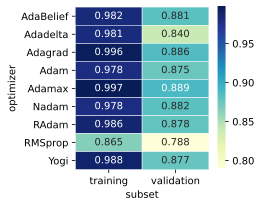

In [226]:
f, ax = plt.subplots(figsize=(3, 3))
g = sns.heatmap(pivot,\
    annot=True, fmt=".3f", linewidths=.5,\
    cmap="YlGnBu", yticklabels=True, ax=ax)

Text(0.5, 1.0, 'ASL classification results per optimizer [LR = 0.001]')

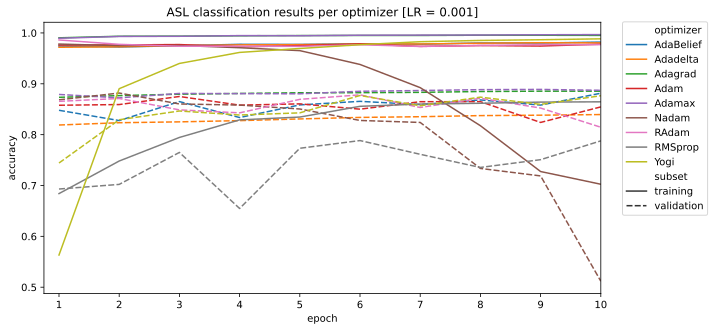

In [227]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=molten, x='epoch', y='accuracy',
            hue='optimizer', style='subset', ax=ax)
ax.legend(bbox_to_anchor=(1.03, 1.02))
plt.xticks(np.arange(11))
plt.xlim(0.75, 10)
plt.title('ASL classification results per optimizer [LR = 0.001]')

In [193]:
df

,acc,batch,batch_time,loss,size,epoch,model_dir,optimizer,learning_rate,job_id,experiment,iteration,c
0,0.984375,0,2.116743,0.028001,64,0,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",1,NaN
1,0.984375,1,0.038301,0.020013,64,0,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",2,NaN
2,1.000000,2,0.043477,0.000212,64,0,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",3,NaN
3,1.000000,3,0.041842,0.000075,64,0,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",4,NaN
4,1.000000,4,0.046491,0.001177,64,0,../models/202102252233_Nadam,Nadam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,0.953125,1219,0.041522,0.122416,64,9,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12227,NaN
12236,1.000000,1220,0.036569,0.012563,64,9,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12228,NaN
12237,0.984375,1221,0.031898,0.045762,64,9,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12229,NaN
12238,0.953125,1222,0.038250,0.173489,64,9,../models/202102252233_RAdam,RAdam,0.001,202102252233,"0.001 LR, batch, asl_alphabet_train",12230,NaN


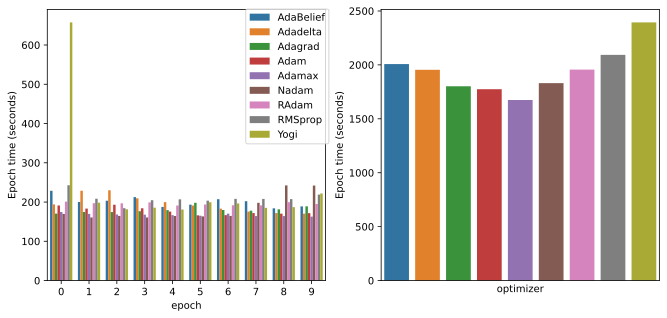

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
dftime = df[~(df['optimizer'] == 'SGD')]

sns.barplot(data=dftime.sort_values('optimizer'),
    x='epoch', y='epoch_time', hue='optimizer',
    ax=ax1)
ax1.set_ylabel('Epoch time (seconds)')

dftimeagg = dftime.groupby(['optimizer']).sum().reset_index()
sns.barplot(data=dftimeagg.sort_values('optimizer'),
    x='optimizer', y='epoch_time',
    ax=ax2)
ax2.set_ylabel('Epoch time (seconds)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax1.legend(bbox_to_anchor=(1.03, 1.02))
# plt.tight_layout()

Old experiments

Group experiments by job id's

In [8]:
experiments = {
# partition: gpu. 15 hr time limit
    # '18102942': '0.001 LR, Logit + Shuffle bug',
    # '18105570': '0.001 LR, Logit + Shuffle bug',
# partition: gpu. cancelled at 5hr mark
    # '18126401': '0.005 LR, Shuffle bug',
# partition: gpushort. 1:30hr spent
    # '18144187': '0.005 LR, no bugs',
# partition: gpu. 10hr time limit
    '18144207': '0.005 LR',
# partition: gpushort. 2hr time limit
    '18149074': '0.001 LR, ImageNet weights',
# partition: gpushort. 2hr time limit
    '18152456': '0.002 LR, 26.000 samples, batch size 128',
    'kaggle': '0.001 LR, asl_alphabet_train'
}

Combine all results data

In [9]:
models = '../models'
def get_data(model_dir):
    try:
        data  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        optim = pd.read_csv(join(model_dir, 'optimizer.csv'))
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name'].values[0]
    data['learning_rate'] = optim['learning_rate'].values[0]
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_[0-9]+')
df['experiment'] = df['job_id'].map(experiments.get)
df

,epoch,accuracy,categorical_accuracy,epoch_time,loss,top_k_categorical_accuracy,val_accuracy,val_categorical_accuracy,val_loss,val_top_k_categorical_accuracy,model_dir,optimizer,learning_rate,job_id,experiment
0,0,0.960651,0.960651,1187.640418,0.145986,0.998803,0.220177,0.220177,13.694115,0.228467,../models/18089307_4,Nadam,0.001,18089307,None
1,1,0.961517,0.961517,1089.068708,0.138320,0.999613,0.230705,0.230705,13.378916,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
2,2,0.961213,0.961213,1099.932372,0.151486,0.999926,0.230705,0.230705,11.557586,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
3,3,0.960577,0.960577,1099.001507,0.168548,1.000000,0.230705,0.230705,11.017899,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
4,4,0.959988,0.959988,1097.658838,0.181303,0.999926,0.230705,0.230705,12.613845,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,0.050651,0.050651,442.151199,3.255408,0.239133,0.000000,0.000000,3.279222,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None
6,6,0.051765,0.051765,442.780842,3.255330,0.241722,0.000000,0.000000,3.279520,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None
7,7,0.052861,0.052861,443.881062,3.255239,0.245986,0.000000,0.000000,3.279980,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None
8,8,0.054925,0.054925,443.738344,3.255123,0.250730,0.000000,0.000000,3.280695,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None


In [10]:
df.groupby(['experiment', 'optimizer', 'learning_rate'])\
  .agg({
      'epoch': 'max',
      'epoch_time': 'mean',
      'accuracy': 'max',
      'val_accuracy': 'max'
   })

epoch  \
experiment                               optimizer          learning_rate          
0.001 LR, ImageNet weights               Adadelta           0.001             69   
                                         Adagrad            0.001             37   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002             11   
                                         RMSprop            0.002             11   
0.005 LR                                 Adadelta           0.005             26   
                                         Adagrad            0.005             79   
                                         Adam               0.005             78   
                                         Adamax             0.005             77   
                                         Ftrl               0.005             17   
                                         Nadam              0.005             73   
                                         RMSprop            0.005             77   
                                         SGD                0.005             32   

                                                                            epoch_time  \
experiment                               optimizer          learning_rate                
0.001 LR, ImageNet weights               Adadelta           0.001           101.109414   
                                         Adagrad            0.001           134.801156   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002           574.731797   
                                         RMSprop            0.002           550.288665   
0.005 LR                                 Adadelta           0.005          1287.715603   
                                         Adagrad            0.005           443.105158   
                                         Adam               0.005           450.070848   
                                         Adamax             0.005           455.344112   
                                         Ftrl               0.005           554.056349   
                                         Nadam              0.005           483.113526   
                                         RMSprop            0.005           452.374973   
                                         SGD                0.005           493.399046   

                                                                           accuracy  \
experiment                               optimizer          learning_rate             
0.001 LR, ImageNet weights               Adadelta           0.001          0.980639   
                                         Adagrad            0.001          0.993847   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002          1.000000   
                                         RMSprop            0.002          0.997320   
0.005 LR                                 Adadelta           0.005          1.000000   
                                         Adagrad            0.005          1.000000   
                                         Adam               0.005          0.999549   
                                         Adamax             0.005          1.000000   
                                         Ftrl               0.005          0.038778   
                                         Nadam              0.005          0.999751   
                                         RMSprop            0.005          0.968747   
                                         SGD                0.005          1.000000   

                                                                           val_accuracy  
experiment                               optimizer          learning_rate                
0.001 LR, ImageNet weights               Adadelta           0.001              0.039542  
                                         Adagrad            0.001              0.039542  
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimize

In [11]:
molten = df.melt(id_vars=['epoch', 'optimizer', 'experiment'],
                 var_name='metric',
                 value_vars=['accuracy', 'val_accuracy'],
                 value_name='value')\
             .sort_values('optimizer')
molten

,epoch,optimizer,experiment,metric,value
1773,11,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",val_accuracy,0.041946
126,10,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
125,9,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
124,8,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
123,7,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
...,...,...,...,...,...
2925,11,SGD,None,val_accuracy,0.000000
2924,10,SGD,None,val_accuracy,0.000000
2923,9,SGD,None,val_accuracy,0.000000
2921,7,SGD,None,val_accuracy,0.000000


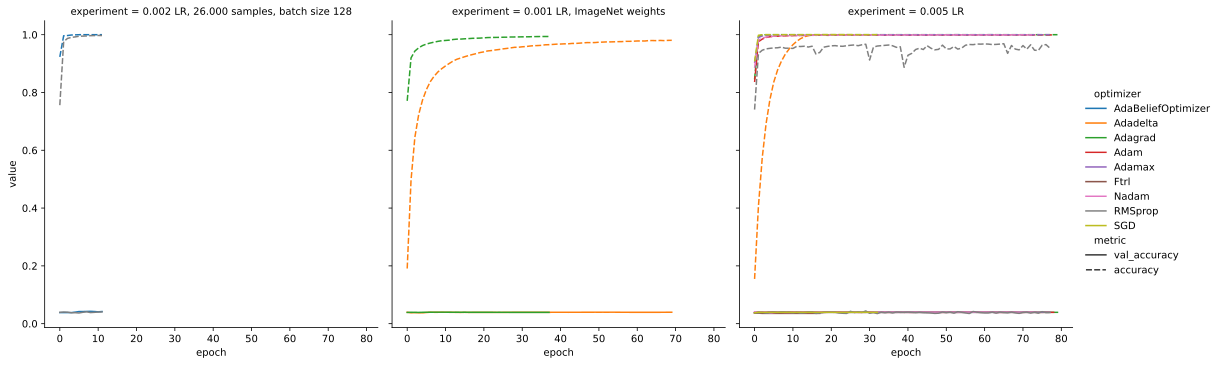

In [12]:
sns.relplot(data=molten, x='epoch', y='value',
    hue='optimizer', kind='line',
    style='metric', col='experiment',
    facet_kws={'sharey': True, 'sharex': True})